In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
import sqlite3

conn = sqlite3.connect('db.sqlite3')
sql = "select * from sport_detail"
df = pd.read_sql(sql,conn)

In [28]:
df.head(5)

,id,student_ID,campus,entryname,appointment_time,appointment_start,appointment_end,Sports_venues,is_delete,Creation_time,appointmentID_id,delete_true
0,45,3960,天赐庄校区,羽毛球,2020-05-08,2020-05-08 15:30:00,2020-05-08 17:30:00,东区综合馆,0,2020-05-08 08:23:47.383241,228,0
1,46,82069,天赐庄校区,羽毛球,2020-05-08,2020-05-08 19:00:00,2020-05-08 21:00:00,东区综合馆,1,2020-05-08 08:27:30.589128,231,0
2,47,82069,天赐庄校区,乒乓球,2020-05-08,2020-05-08 19:00:00,2020-05-08 21:00:00,本部公体楼乒乓房,1,2020-05-08 08:30:18.922353,47,0
3,48,3960,天赐庄校区,羽毛球,2020-05-09,2020-05-09 15:30:00,2020-05-09 17:30:00,东区综合馆,0,2020-05-08 08:29:45.430441,237,0
4,49,82069,天赐庄校区,羽毛球,2020-05-08,2020-05-08 19:00:00,2020-05-08 21:00:00,东区综合馆,1,2020-05-08 08:39:19.240116,231,0


总列表的行列

In [6]:
df.shape

(6778, 12)

In [47]:
df1 = df.drop_duplicates('student_ID')#无重复表

In [50]:
df1.shape[0]

1635

师生人数对比

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6778 entries, 0 to 6777
Data columns (total 12 columns):
id                   6778 non-null int64
student_ID           6778 non-null object
campus               6778 non-null object
entryname            6778 non-null object
appointment_time     6778 non-null object
appointment_start    6778 non-null object
appointment_end      6778 non-null object
Sports_venues        6778 non-null object
is_delete            6778 non-null int64
Creation_time        6778 non-null object
appointmentID_id     6778 non-null int64
delete_true          6778 non-null int64
dtypes: int64(4), object(8)
memory usage: 423.7+ KB


In [62]:
df老师人数 = df1[df1["student_ID"].str.len()<=6]

In [63]:
df老师人数.shape[0]

175

In [64]:
df学生人数 = df1[df1["student_ID"].str.len()>6]

In [65]:
df学生人数.shape[0]

1460

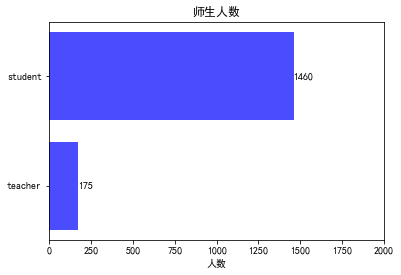

In [76]:
price = [175,1460]

plt.barh(range(2),price,align = 'center', color = 'blue', alpha = .7)
plt.xlabel('人数')
plt.title('师生人数')
plt.yticks(range(2),['teacher','student'])
plt.xlim([0,2000])

for x,y in enumerate(price):
    plt.text(y+0.1, x, '%s' %y, va = 'center')

各校区预约人数统计

In [22]:
df天赐庄 = df[df['campus'].str.contains('天赐庄校区')]

In [23]:
df天赐庄.shape[0]

2152

In [24]:
df独墅湖 = df[df['campus'].str.contains('独墅湖校区')]

In [25]:
df独墅湖.shape[0]

4609

In [26]:
df阳澄湖 = df[df['campus'].str.contains('阳澄湖校区')]

In [27]:
df阳澄湖.shape[0]

16

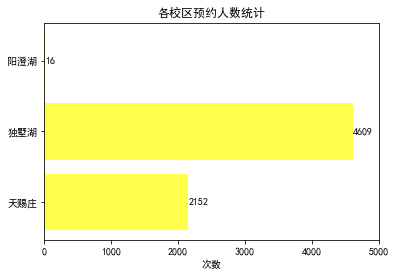

In [77]:
price = [2152,4609,16]

plt.barh(range(3),price,align = 'center', color = 'yellow', alpha = .7)
plt.xlabel('次数')
plt.title('各校区预约人数统计')
plt.yticks(range(3),['天赐庄','独墅湖','阳澄湖'])
plt.xlim([0,5000])

for x,y in enumerate(price):
    plt.text(y+0.1, x, '%s' %y, va = 'center')

运动受欢迎类型排序

In [43]:
df['entryname'].nunique()

7

In [42]:
df['entryname'].value_counts().head(7)

羽毛球                            3288
篮球                             2346
乒乓球                             431
足球                              413
网球                              249
排球                               50
%E7%BE%BD%E6%AF%9B%E7%90%83       1
Name: entryname, dtype: int64

In [ ]:
price = [3288,2346,431,413,249,50]

plt.barh(range(6),price,align = 'center', color = 'green', alpha = .7)
plt.xlabel('次数')
plt.title('运动类型')
plt.yticks(range(6),['羽毛球 ','篮球','乒乓球'])
plt.xlim([0,5000])

for x,y in enumerate(price):
    plt.text(y+0.1, x, '%s' %y, va = 'center')

老师最喜欢项目

In [66]:
df老师喜欢 = df[df["student_ID"].str.len()<=6]

In [67]:
df老师喜欢['entryname'].value_counts().head(7)

羽毛球    327
网球      92
乒乓球     51
足球      50
篮球      37
Name: entryname, dtype: int64

学生最喜欢项目

In [68]:
df学生喜欢 = df[df["student_ID"].str.len()>6]

In [78]:
df学生喜欢['entryname'].value_counts().head(6)

羽毛球    2961
篮球     2309
乒乓球     380
足球      363
网球      157
排球       50
Name: entryname, dtype: int64

最受欢迎运动场馆

In [44]:
df['Sports_venues'].nunique()

18

In [45]:
df['Sports_venues'].value_counts().head(10)

公共体育楼         2261
二期南侧篮球场       1452
东校区锅炉房         714
东区综合馆          684
东区田径场西侧篮球场     476
二期北侧篮球场        414
二期足球场          302
网球场            157
东区游泳馆西侧足球场     105
东区网球场           51
Name: Sports_venues, dtype: int64

10大运动大人

In [51]:
df['student_ID'].value_counts().head(10)

20994506056    37
9903403039     35
20994059009    32
20975226040    31
20974229055    30
9709404994     30
20994506059    30
20984207049    28
9794409070     28
20974009092    28
Name: student_ID, dtype: int64